In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Cars-RF.csv')

In [3]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1727 non-null   object
 1   maint          1727 non-null   object
 2   doors          1727 non-null   object
 3   persons        1727 non-null   object
 4   lug_boot       1727 non-null   object
 5   safety         1727 non-null   object
 6   acceptability  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].value_counts()}")

buying: high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
maint: high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
doors: 3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
persons: 4       576
more    576
2       575
Name: persons, dtype: int64
lug_boot: med      576
big      576
small    575
Name: lug_boot, dtype: int64
safety: med     576
high    576
low     575
Name: safety, dtype: int64
acceptability: unacc    1209
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64


In [6]:
print(df.isnull().sum())

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['acceptability'], axis=1), df['acceptability'], test_size=0.4, random_state=0)
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (1036, 6)
X_test (691, 6)


In [8]:
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print(X_train.dtypes)

X_train: (1036, 6) X_test: (691, 6)
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier()

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
rf_100 = RandomForestClassifier(n_estimators=100)

In [30]:
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
importance_scores = rf_100.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

In [18]:
print(feature_importance_df)

    Feature  Importance
5    safety    0.270480
3   persons    0.238098
0    buying    0.168703
1     maint    0.162652
4  lug_boot    0.085476
2     doors    0.074591


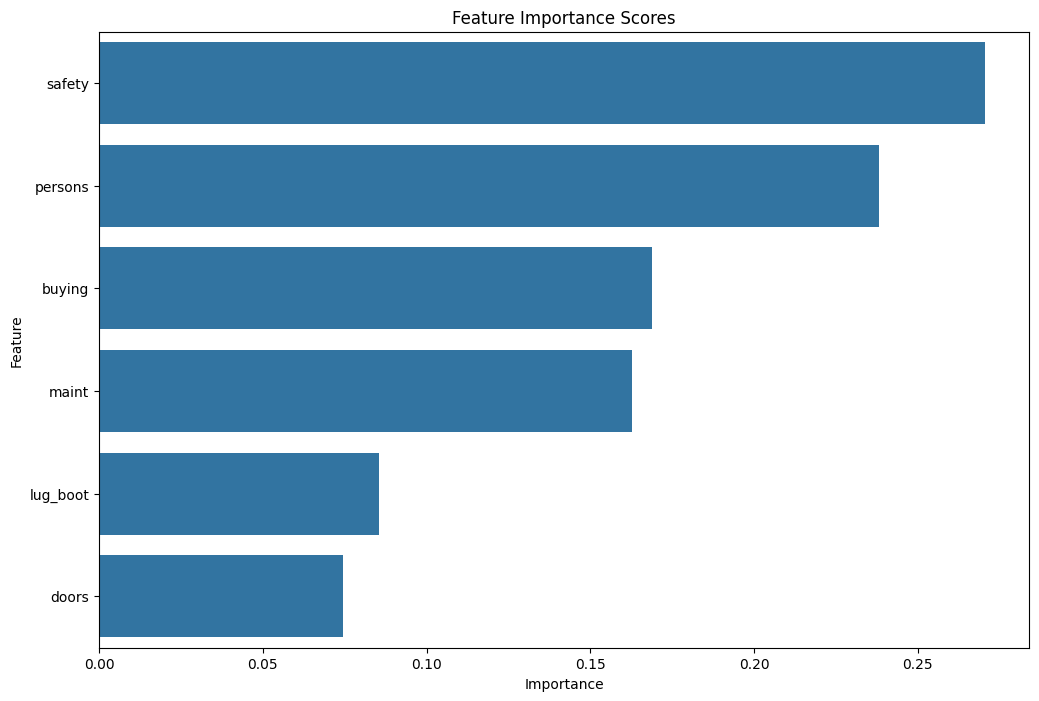

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Scores')
plt.show()

In [20]:
selected_features = feature_importance_df['Feature'][:3]

In [21]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
rf_selected = RandomForestClassifier(n_estimators=100)
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier()

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_selected.predict(X_test_selected)))

[[115   0  35   7]
 [ 24   0   0   4]
 [ 32   0 440   1]
 [ 24   0   0   9]]


In [23]:
confusion_matrix = confusion_matrix(y_test, rf_selected.predict(X_test_selected))
print(confusion_matrix)

[[115   0  35   7]
 [ 24   0   0   4]
 [ 32   0 440   1]
 [ 24   0   0   9]]


In [25]:
class_report = classification_report(y_test, rf_selected.predict(X_test_selected))
print(class_report)

              precision    recall  f1-score   support

         acc       0.59      0.73      0.65       157
        good       0.00      0.00      0.00        28
       unacc       0.93      0.93      0.93       473
       vgood       0.43      0.27      0.33        33

    accuracy                           0.82       691
   macro avg       0.49      0.48      0.48       691
weighted avg       0.79      0.82      0.80       691



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
